In [ ]:
import numpy as np
import pandas as pd
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *
import matplotlib.pyplot as plt
import tweepy as tw
import csv
import string
import re
from nltk.tokenize import word_tokenize

In [ ]:
ACCESS_TOKEN="1571225528748630019-EcwlxWxBZscFI8EKSc4qTRmVGOv0Vw"
ACCESS_TOKEN_SECRET="rbMFeCm3dIignzFKBXKClVqCMCxsWq9K15Ixcnsgp8GOf"

CUSTOMER_API_KEY="9roaweF3NzesR5eZliG8KZEri"
CUSTOMER_API_SECRET="PisH5oSYYljNcOuvDvt0z5kCNGtPkvD9LxlvbECoH2uYEixOTq"

In [ ]:
#create an authentication object
my_auth_obj=tw.OAuthHandler(CUSTOMER_API_KEY,CUSTOMER_API_SECRET)
#Set access taken to auth object
my_auth_obj.set_access_token(ACCESS_TOKEN,ACCESS_TOKEN_SECRET)
#create an API object to get tweets using authentication object
my_api=tw.API(my_auth_obj)

# Collecting the data

In [4]:
tweets_alt=[]
for i in tw.Cursor(my_api.search_tweets,q="#Altcoin ,since:2022-11-1",lang="en").items(1000): #,until="2022-11-08"
    tweets_alt.append(i)
    
len(tweets_alt)

1000

In [5]:
tweets_bit=[]
for i in tw.Cursor(my_api.search_tweets,q="#Bitcoin ,since:2022-11-1",lang="en").items(1000): #,until="2022-11-08"
    tweets_bit.append(i)
    
len(tweets_bit)

1000

In [4]:
tweets_cryp=[]
for i in tw.Cursor(my_api.search_tweets,q="#Cryptocurrency ,since:2022-11-1",lang="en").items(1000): #,until="2022-11-08"
    tweets_cryp.append(i)
    
len(tweets_cryp)

1000

In [5]:
tweets_coin=[]
for i in tw.Cursor(my_api.search_tweets,q="#Coindesk ,since:2022-11-1",lang="en").items(1000): #,until="2022-11-08"
    tweets_coin.append(i)
    
len(tweets_coin)

407

In [6]:
tweets_ap=[]
for i in tw.Cursor(my_api.search_tweets,q="#APPLE ,since:2022-11-1",lang="en").items(1000): #,until="2022-11-08"
    tweets_ap.append(i)
    
len(tweets_ap)

1000

In [7]:
tweets_go=[]
for i in tw.Cursor(my_api.search_tweets,q="#GOOG ,since:2022-11-1",lang="en").items(1000): #,until="2022-11-08"
    tweets_go.append(i)
    
len(tweets_go)

251

In [8]:
tweets_y=[]
for i in tw.Cursor(my_api.search_tweets,q="#YAHOO ,since:2022-11-1",lang="en").items(1000): #,until="2022-11-08"
    tweets_y.append(i)
    
len(tweets_y)

1000

In [37]:
tweets_gold=[]
for i in tw.Cursor(my_api.search_tweets,q="#gold ,since:2022-11-1",lang="en").items(1000): #,until="2022-11-08"
    tweets_gold.append(i)

In [38]:
len(tweets_gold)

1000

# Saving Data

In [39]:
altcoin=pd.DataFrame(data=[[i.created_at.date(),"{}:{}:{}".format(i.created_at.timetuple().tm_hour,i.created_at.timetuple().tm_min,i.created_at.timetuple().tm_sec),i.id,i.author.screen_name,i.user.id,i.text] for i in tweets_alt],columns=["Date","Time","ID","UserName","UserID","Tweet"])
bitcoin=pd.DataFrame(data=[[i.created_at.date(),"{}:{}:{}".format(i.created_at.timetuple().tm_hour,i.created_at.timetuple().tm_min,i.created_at.timetuple().tm_sec),i.id,i.author.screen_name,i.user.id,i.text] for i in tweets_bit],columns=["Date","Time","ID","UserName","UserID","Tweet"])
crypto=pd.DataFrame(data=[[i.created_at.date(),"{}:{}:{}".format(i.created_at.timetuple().tm_hour,i.created_at.timetuple().tm_min,i.created_at.timetuple().tm_sec),i.id,i.author.screen_name,i.user.id,i.text] for i in tweets_cryp],columns=["Date","Time","ID","UserName","UserID","Tweet"])
coindesk=pd.DataFrame(data=[[i.created_at.date(),"{}:{}:{}".format(i.created_at.timetuple().tm_hour,i.created_at.timetuple().tm_min,i.created_at.timetuple().tm_sec),i.id,i.author.screen_name,i.user.id,i.text] for i in tweets_coin],columns=["Date","Time","ID","UserName","UserID","Tweet"])
APPL=pd.DataFrame(data=[[i.created_at.date(),"{}:{}:{}".format(i.created_at.timetuple().tm_hour,i.created_at.timetuple().tm_min,i.created_at.timetuple().tm_sec),i.id,i.author.screen_name,i.user.id,i.text] for i in tweets_ap],columns=["Date","Time","ID","UserName","UserID","Tweet"])
GOOG=pd.DataFrame(data=[[i.created_at.date(),"{}:{}:{}".format(i.created_at.timetuple().tm_hour,i.created_at.timetuple().tm_min,i.created_at.timetuple().tm_sec),i.id,i.author.screen_name,i.user.id,i.text] for i in tweets_go],columns=["Date","Time","ID","UserName","UserID","Tweet"])
YAHOO=pd.DataFrame(data=[[i.created_at.date(),"{}:{}:{}".format(i.created_at.timetuple().tm_hour,i.created_at.timetuple().tm_min,i.created_at.timetuple().tm_sec),i.id,i.author.screen_name,i.user.id,i.text] for i in tweets_y],columns=["Date","Time","ID","UserName","UserID","Tweet"])
gold=pd.DataFrame(data=[[i.created_at.date(),"{}:{}:{}".format(i.created_at.timetuple().tm_hour,i.created_at.timetuple().tm_min,i.created_at.timetuple().tm_sec),i.id,i.author.screen_name,i.user.id,i.text] for i in tweets_gold],columns=["Date","Time","ID","UserName","UserID","Tweet"])

In [40]:
#converting to csv format

altcoin.to_csv("test_csv/Tweets_altcoin.csv")
bitcoin.to_csv("test_csv/Tweets_bitcoin.csv")
crypto.to_csv("test_csv/Tweets_cryptocurrency.csv")
coindesk.to_csv("test_csv/Tweets_coindesk.csv")
APPL.to_csv("test_csv/Tweets_APPL.csv")
GOOG.to_csv("test_csv/Tweets_GOOG.csv")
YAHOO.to_csv("test_csv/Tweets_YAHOO.csv")
gold.to_csv("test_csv/Tweets_gold.csv")

# Cleaning the data

In [15]:
stopwords = nltk.corpus.stopwords.words('english')

In [16]:
punctuation_list = list(string.punctuation)

In [17]:
def clean(column):
    updated_tokens = []
    for text in column:
        tokens=word_tokenize(text.lower()) 
        updated_token_string = ''
        for token in tokens:
            if (token not in punctuation_list) and (len(token)>2) and (token not in stopwords):
                updated_token = ''
                for element in token:
                    if (element not in punctuation_list) and (ord(element) not in range(48,58)) and (ord(element)<= 200):
                        updated_token += element
                if len(updated_token):
                    if len(updated_token_string):
                        updated_token_string += ' '
                    updated_token_string += (updated_token)
        updated_tokens.append(updated_token_string)
    return updated_tokens

In [18]:
df_altcoin = pd.read_csv("test_csv/Tweets_altcoin.csv",index_col='Unnamed: 0')
df_altcoin["Clean_Tweet"]=clean(df_altcoin["Tweet"])
df_altcoin.head()

,Date,Time,ID,UserName,UserID,Tweet,Clean_Tweet
0,2022-11-11,20:18:37,1591163507239972864,0xEthereumYoda,1551067188882116608,#Ethereum price update: \n\n#ETH $1259.19 USD\...,ethereum price update eth usd bitcoin btc foll...
1,2022-11-11,20:18:30,1591163479536599041,BNB_Tracker,1546364668503298048,#BinanceCoin price update: $BNB\n\n#BNB $286.4...,binancecoin price update bnb bnb usd bitcoin b...
2,2022-11-11,20:18:27,1591163464642613249,beigi65,1574706917930303491,RT @NikolaBench: #Shill me an #altcoin to buy ...,nikolabench shill altcoin buy weekend
3,2022-11-11,20:18:21,1591163441682984960,Sardor44641891,1407016888668983298,RT @ChinaPumpWXC: Which #altcoin 💎 on #BSC #ER...,chinapumpwxc altcoin bsc erc buy next
4,2022-11-11,20:18:17,1591163423798484993,amir60584503,1577387643809185792,RT @CryptoThro: Shill me your best #altcoin or...,cryptothro shill best altcoin memecoin


In [19]:
df_bitcoin = pd.read_csv("test_csv/Tweets_bitcoin.csv",index_col='Unnamed: 0')
df_bitcoin["Clean_Tweet"]=clean(df_bitcoin["Tweet"])
df_bitcoin.head()

,Date,Time,ID,UserName,UserID,Tweet,Clean_Tweet
0,2022-11-11,20:19:26,1591163714094657536,ilahitoibrahim,1568195039230324737,RT @army_shiba: $SHIB is the second biggest ho...,armyshiba shib second biggest holding cryptoco...
1,2022-11-11,20:19:25,1591163710378082304,Deeznutzwoody,1439674378963329025,RT @namcios: If you still have #bitcoin on an ...,namcios still bitcoin exchange withdraw simple...
2,2022-11-11,20:19:24,1591163704489693184,imTheRealMigu,98906707,RT @WatcherGuru: JUST IN: Michael Saylor's Mic...,watcherguru michael saylor microstrategy bitco...
3,2022-11-11,20:19:24,1591163703701172225,LoydGonzalez_,1551700441318055936,"RT @BTC_Archive: JUST IN: 3,500 #Bitcoin worth...",btcarchive bitcoin worth m moved first time since
4,2022-11-11,20:19:23,1591163700836151296,RememberGacheru,1023817902808616960,RT @cryptobits_org: FTX customers attempt roun...,cryptobitsorg ftx customers attempt roundabout...


In [20]:
df_cryptocurrency = pd.read_csv("test_csv/Tweets_cryptocurrency.csv",index_col='Unnamed: 0')
df_cryptocurrency["Clean_Tweet"]=clean(df_cryptocurrency["Tweet"])
df_cryptocurrency

,Date,Time,ID,UserName,UserID,Tweet,Clean_Tweet
0,2022-11-11,21:0:38,1591174080631373829,CheekyCrypto,1303395304767709184,Are these EXCHANGES next? FTX &amp; FTT brings...,exchanges next ftx amp ftt brings crypto winte...
1,2022-11-11,21:0:36,1591174072611864582,sheterroma,825618999052492801,👑ZetaChain is the only decentralized blockchai...,zetachain decentralized blockchain smart contr...
2,2022-11-11,21:0:33,1591174062780612609,Amir608914705,1463830586162696197,RT @Airdrop_Father: ☄️ UniDogeFinance Airdrop\...,airdropfather unidogefinance airdrop rewards u...
3,2022-11-11,21:0:32,1591174058951184384,Airlegilucxy,1202573953304276997,RT @cookieslovedone: Withdraw all cryptocurren...,cookieslovedone withdraw cryptocurrency exchan...
4,2022-11-11,21:0:32,1591174057092939780,takeoff_tech,991921938334343168,【$TKO token #2】\nTKO token will be used in Tak...,tko token tko token used takeoff news search t...
...,...,...,...,...,...,...,...
995,2022-11-11,20:9:42,1591161266466598913,cryptoholder0,1447904564569681922,RT @ultron_found: Find out more about what we'...,ultronfound find re building https tcovyvxluae...
996,2022-11-11,20:9:42,1591161263954034720,KatrinSamurai,1534112670256877569,RT @KatrinSamurai: The #RBXS marketing team us...,katrinsamurai rbxs marketing team uses great m...
997,2022-11-11,20:9:40,1591161254739152898,TraderMarcoCost,118794845,RT @TraderMarcoCost: Trader &amp; Investor. 15...,tradermarcocost trader amp investor years demo...
998,2022-11-11,20:9:40,1591161254705795073,KatrinSamurai,1534112670256877569,RT @KatrinSamurai: #RBXS The strongest and bes...,katrinsamurai rbxs strongest best team field d...


In [80]:
df_coindesk = pd.read_csv("test_csv/Tweets_coindesk.csv",index_col='Unnamed: 0')
df_coindesk["Clean_Tweet"]=clean(df_coindesk["Tweet"])
df_coindesk

,Date,Time,ID,UserName,UserID,Tweet,Clean_Tweet
0,2022-11-11,20:0:2,1591158833581359104,BTCticker,1323280062,One Bitcoin now worth $16833.328. Market Cap $...,one bitcoin worth market cap billion based coi...
1,2022-11-11,18:30:21,1591136263809208322,boxpiperapp,1304864618993520641,Speechless https://t.co/OEA0e72YF9 #cryptohaye...,speechless https tcooeaeyf cryptohayes cryptoc...
2,2022-11-11,18:22:4,1591134179429081090,DikeReality,1151516210233827330,#SEC Commissioner Hester Peirce: #FTX’s Collap...,sec commissioner hester peirce ftx collapse co...
3,2022-11-11,18:0:3,1591128636156829696,BTCticker,1323280062,One Bitcoin now worth $16894.184. Market Cap $...,one bitcoin worth market cap billion based coi...
4,2022-11-11,16:54:12,1591112067532361728,bethune_jane,1515494812857913347,One Bitcoin now worth $16853.284. Market Cap $...,one bitcoin worth market cap billion based coi...
...,...,...,...,...,...,...,...
402,2022-11-03,8:0:3,1588078539118727168,BTCticker,1323280062,One Bitcoin now worth $20319.285. Market Cap $...,one bitcoin worth market cap billion based coi...
403,2022-11-03,6:0:3,1588048338842157057,BTCticker,1323280062,One Bitcoin now worth $20381.226. Market Cap $...,one bitcoin worth market cap billion based coi...
404,2022-11-03,4:0:3,1588018141023567872,BTCticker,1323280062,One Bitcoin now worth $20303.854. Market Cap $...,one bitcoin worth market cap billion based coi...
405,2022-11-03,2:0:2,1587987938343780352,BTCticker,1323280062,One Bitcoin now worth $20300.945. Market Cap $...,one bitcoin worth market cap billion based coi...


In [22]:
df_APPL = pd.read_csv("test_csv/Tweets_APPL.csv",index_col='Unnamed: 0')
df_APPL["Clean_Tweet"]=clean(df_APPL["Tweet"])
df_APPL

,Date,Time,ID,UserName,UserID,Tweet,Clean_Tweet
0,2022-11-11,21:43:51,1591184957916971009,hubofml,3040871649,RT @danieldekok: Madeesh Kannan ran gemm-bench...,danieldekok madeesh kannan ran gemmbenchmark u...
1,2022-11-11,21:43:45,1591184934403985409,MColebrook,23417129,RT @danieldekok: Madeesh Kannan ran gemm-bench...,danieldekok madeesh kannan ran gemmbenchmark u...
2,2022-11-11,21:43:34,1591184887356493825,Greg45120,3359191271,RT @Casatti20: LS - top overlay &amp; widgy @K...,casatti top overlay amp widgy kothuq wallpaper...
3,2022-11-11,21:43:14,1591184801675235328,minutes_mac,1054581666683875328,Go out and get your Veteran’s Day Activity awa...,get veteran day activity award today minutes p...
4,2022-11-11,21:43:4,1591184759283396608,Fletcher410,1378918670282354688,RT @Jonys1978: my Apple Watch has style\n#Reef...,jonys apple watch style reefchain apple denkom...
...,...,...,...,...,...,...,...
995,2022-11-11,14:1:44,1591068662072737794,JackCla19310726,1539355602547351552,RT @WeAreSaitama: 🍎 IT’S HERE📱 The much antici...,wearesaitama here much anticipated update sait...
996,2022-11-11,14:1:39,1591068640933470213,mburnett84,1586030077971668992,Apple Mac OS computers or Microsoft Windows co...,apple mac computers microsoft windows computer...
997,2022-11-11,14:1:3,1591068491402326016,LelumJayasooriy,788038783547674625,Fancy beach\nDownload Now - https://t.co/QEmpV...,fancy beach download https tcoqempvggsz subscr...
998,2022-11-11,14:0:51,1591068441716334592,Hk3ToN,270981443,Mod. By @Hk3ToN\n----------------------\n#Appl...,mod hkton apple android ios iphonepro iphone i...


In [23]:
df_GOOG = pd.read_csv("test_csv/Tweets_GOOG.csv",index_col='Unnamed: 0')
df_GOOG["Clean_Tweet"]=clean(df_GOOG["Tweet"])
df_GOOG

,Date,Time,ID,UserName,UserID,Tweet,Clean_Tweet
0,2022-11-11,20:7:45,1591160774101114880,ScalpMastert1,1166215998669840384,RT @ScalpMaster1: #AAPL worth as much as #META...,scalpmaster aapl worth much meta amzn goog put...
1,2022-11-11,18:53:47,1591142159876784129,leoventuresllc,893305069059403776,Google is the internet !! #google #googl #goog...,google internet google googl goog stock market...
2,2022-11-11,18:23:47,1591134609043251202,leoventuresllc,893305069059403776,Google...What Can I Say !! #google #googl #sto...,google say google googl stock tech internet go...
3,2022-11-11,18:14:3,1591132161125810176,brian_mulligan,34089380,ARE HEDGE FUND SHORTERS OFF TODAY???? #AMC #AP...,hedge fund shorters today amc ape gme tsla amz...
4,2022-11-11,17:24:7,1591119592998735873,ranu5,158637103,$GOOG #GOOG woohoo given target achieved today...,goog goog woohoo given target achieved today e...
...,...,...,...,...,...,...,...
246,2022-11-03,1:53:47,1587986365274357760,leoventuresllc,893305069059403776,Google is the internet !! #google #googl #goog...,google internet google googl goog stock market...
247,2022-11-03,1:43:2,1587983660871213056,futuristic_PH,121421348,"Crypto is volatile..\n\nMeanwhile,\n\n#Bitcoin...",crypto volatile meanwhile bitcoin tsla msft go...
248,2022-11-03,1:23:47,1587978816173101059,leoventuresllc,893305069059403776,Google...What Can I Say !! #google #googl #sto...,google say google googl stock tech internet go...
249,2022-11-03,0:55:11,1587971616968957952,MegaproData,1531371903419564034,Most Popular Stocks updated @ 11-02 19:55ET --...,popular stocks updated et https tcoalyhjsisqr ...


In [24]:
df_YAHOO = pd.read_csv("test_csv/Tweets_YAHOO.csv",index_col='Unnamed: 0')
df_YAHOO["Clean_Tweet"]=clean(df_YAHOO["Tweet"])
df_YAHOO

,Date,Time,ID,UserName,UserID,Tweet,Clean_Tweet
0,2022-11-11,21:44:5,1591185017840934913,BrownsChat,3018973980,News &amp; Notes: Myles Garrett believes Denze...,news amp notes myles garrett believes denzel w...
1,2022-11-11,21:41:3,1591184255534735371,ColtsSupporters,3023214667,Fantasy Football Daily Notes: Raiders put Wall...,fantasy football daily notes raiders put walle...
2,2022-11-11,21:41:1,1591184244856037387,BrownsChat,3018973980,Will the Cleveland Browns upset the Miami Dolp...,cleveland browns upset miami dolphins final pr...
3,2022-11-11,21:41:0,1591184240946941952,BillsNewsNow,3029125923,Elbow injury to Bills' Josh Allen reminds Whit...,elbow injury bills josh allen reminds whitwort...
4,2022-11-11,21:41:0,1591184240854847488,BuccaneersViews,3037620558,Tom Brady elaborates on his belief that the Bu...,tom brady elaborates belief buccaneers lacking...
...,...,...,...,...,...,...,...
995,2022-11-10,17:37:6,1590760472596185088,BrownsChat,3018973980,Defeating Dolphins Defense Starts with Solving...,defeating dolphins defense starts solving star...
996,2022-11-10,17:37:4,1590760464551743515,ColtsSupporters,3023214667,The Colts Hired Jeff Saturday As Head Coach. W...,colts hired jeff saturday head coach questions...
997,2022-11-10,17:37:3,1590760460659306496,DolphinsViews,3031939171,Defeating Dolphins Defense Starts with Solving...,defeating dolphins defense starts solving star...
998,2022-11-10,17:37:2,1590760458125877248,CommandersViews,3031941805,Commanders cornerback thinks team needs 'a fre...,commanders cornerback thinks team needs fresh ...


In [56]:
df_gold = pd.read_csv("test_csv/Tweets_gold.csv",index_col='Unnamed: 0')
df_gold["Clean_Tweet"]=clean(df_gold["Tweet"])
df_gold

,Date,Time,ID,UserName,UserID,Tweet,Clean_Tweet
0,2022-11-11,22:10:12,1591191588344299520,PopescuCo,369786451,#Gold Price in British Pound vs Pound/USDollar...,gold price british pound poundusdollar today n...
1,2022-11-11,22:9:52,1591191504311263240,artofkaizen,268901120,RT @DollarCostAvg: Textbook ascending broadeni...,dollarcostavg textbook ascending broadening we...
2,2022-11-11,22:9:45,1591191477035864065,VJMS9,1002346553049092098,Excited to share the latest addition to my #et...,excited share latest addition etsy shop sale c...
3,2022-11-11,22:9:19,1591191367413530625,PopescuCo,369786451,#Gold Price in Swiss Franc vs Franc/USDollar t...,gold price swiss franc francusdollar today nov...
4,2022-11-11,22:9:18,1591191364955668481,Space_Gray_Cat,1495458527501897732,#Gold: SPDR Gold Shares ETF (GLD) closed today...,gold spdr gold shares etf gld closed today htt...
...,...,...,...,...,...,...,...
995,2022-11-11,17:28:13,1591120625749602305,MarkTwaint,903716874055245824,RT @WallStreetSilv: SBF said yesterday their U...,wallstreetsilv sbf said yesterday division imp...
996,2022-11-11,17:28:3,1591120585975017473,MacroStratChris,1039833270136000512,"""The 'Policy Pivot' May Not Be Bullish"" - Zero...",policy pivot may bullish zeroedge kidding spy ...
997,2022-11-11,17:27:40,1591120488579076097,silahsilva1981,1440561124357726220,RT @itmtrading_zang: Leverage will kill you.Ph...,itmtradingzang leverage kill youphysical gold ...
998,2022-11-11,17:27:21,1591120407918444544,MustafaSala7,32631046,#Eternity #Gold Puffed #Heart Drop #Earrings\n...,eternity gold puffed heart drop earrings https...


# Visualizing the data

## by hourly number of tweets

In [69]:
df_altcoin.Time = [int(i.split(':')[0]) for i in df_altcoin.Time] 

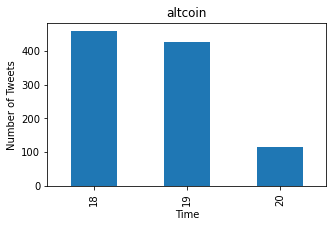

In [71]:
df_altcoin.groupby(by='Time')['Time'].describe()['count'].plot(kind='bar',title='altcoin',figsize=(5,3))
plt.xlabel("Time")
plt.ylabel("Number of Tweets")
plt.show()

In [72]:
df_bitcoin.Time = [int(i.split(':')[0]) for i in df_bitcoin.Time] 

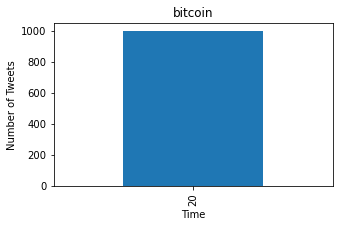

In [73]:
df_bitcoin.groupby(by='Time')['Time'].describe()['count'].plot(kind='bar',title='bitcoin',figsize=(5,3))
plt.xlabel("Time")
plt.ylabel("Number of Tweets")
plt.show()

In [74]:
df_cryptocurrency.Time = [int(i.split(':')[0]) for i in df_cryptocurrency.Time] 

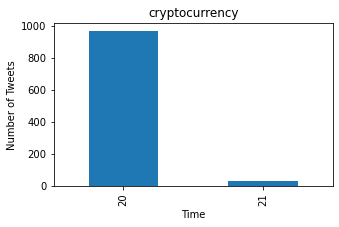

In [75]:
df_cryptocurrency.groupby(by='Time')['Time'].describe()['count'].plot(kind='bar',title='cryptocurrency',figsize=(5,3))
plt.xlabel("Time")
plt.ylabel("Number of Tweets")
plt.show()

In [81]:
df_coindesk.Time = [int(i.split(':')[0]) for i in df_coindesk.Time] 

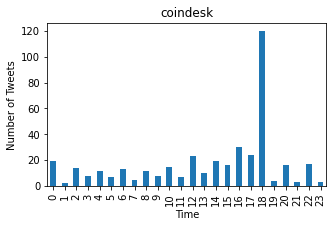

In [82]:
df_coindesk.groupby(by='Time')['Time'].describe()['count'].plot(kind='bar',title='coindesk',figsize=(5,3))
plt.xlabel("Time")
plt.ylabel("Number of Tweets")
plt.show()

In [83]:
df_APPL.Time = [int(i.split(':')[0]) for i in df_APPL.Time] 

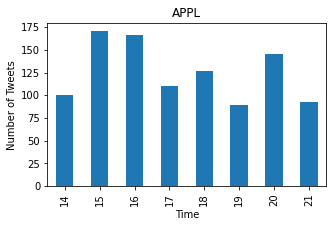

In [84]:
df_APPL.groupby(by='Time')['Time'].describe()['count'].plot(kind='bar',title='APPL',figsize=(5,3))
plt.xlabel("Time")
plt.ylabel("Number of Tweets")
plt.show()

In [85]:
df_GOOG.Time = [int(i.split(':')[0]) for i in df_GOOG.Time] 

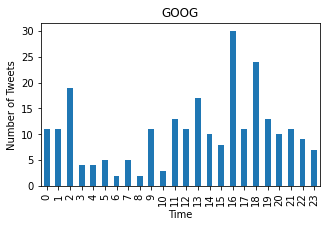

In [86]:
df_GOOG.groupby(by='Time')['Time'].describe()['count'].plot(kind='bar',title='GOOG',figsize=(5,3))
plt.xlabel("Time")
plt.ylabel("Number of Tweets")
plt.show()

In [87]:
df_YAHOO.Time = [int(i.split(':')[0]) for i in df_YAHOO.Time] 

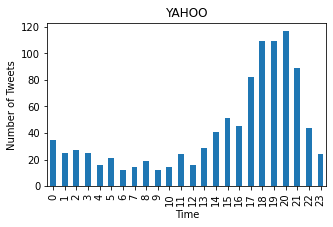

In [88]:
df_YAHOO.groupby(by='Time')['Time'].describe()['count'].plot(kind='bar',title='YAHOO',figsize=(5,3))
plt.xlabel("Time")
plt.ylabel("Number of Tweets")
plt.show()

In [64]:
df_gold.Time = [int(i.split(':')[0]) for i in df_gold.Time] 

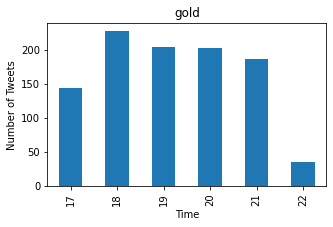

In [68]:
df_gold.groupby(by='Time')['Time'].describe()['count'].plot(kind='bar',title='gold',figsize=(5,3))
plt.xlabel("Time")
plt.ylabel("Number of Tweets")
plt.show()

## by daily number of tweets

In [45]:
df_GOOG.Date = pd.to_datetime(df_GOOG.Date,format='%Y-%m-%d')

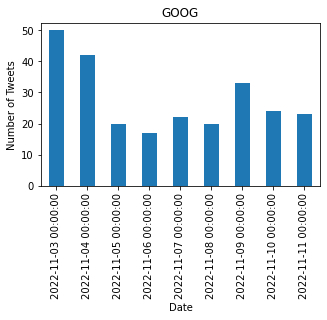

In [46]:
df_GOOG.groupby(by='Date')['Date'].describe()['count'].plot(kind='bar',title='GOOG',figsize=(5,3))
plt.xlabel("Date")
plt.ylabel("Number of Tweets")
plt.show()

In [32]:
df_coindesk.Date = pd.to_datetime(df_coindesk.Date)

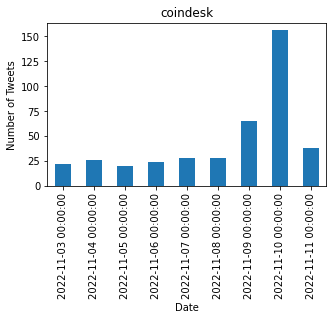

In [33]:
df_coindesk.groupby(by='Date')['Date'].describe()['count'].plot(kind='bar',title='coindesk',figsize=(5,3))
plt.xlabel("Date")
plt.ylabel("Number of Tweets")
plt.show()

## by hourly number of users

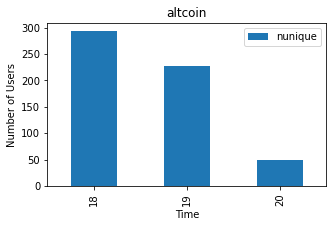

In [160]:
df_altcoin.groupby(by=['Time'])['UserName'].agg(['nunique']).plot(kind='bar',title='altcoin',figsize=(5,3))
plt.ylabel("Number of Users")
plt.show()

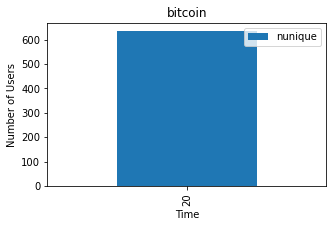

In [161]:
df_bitcoin.groupby(by=['Time'])['UserName'].agg(['nunique']).plot(kind='bar',title='bitcoin',figsize=(5,3))
plt.ylabel("Number of Users")
plt.show()

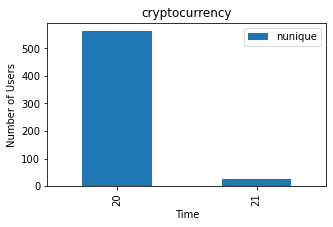

In [162]:
df_cryptocurrency.groupby(by=['Time'])['UserName'].agg(['nunique']).plot(kind='bar',title='cryptocurrency',figsize=(5,3))
plt.ylabel("Number of Users")
plt.show()

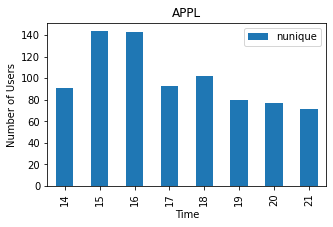

In [163]:
df_APPL.groupby(by=['Time'])['UserName'].agg(['nunique']).plot(kind='bar',title='APPL',figsize=(5,3))
plt.ylabel("Number of Users")
plt.show()

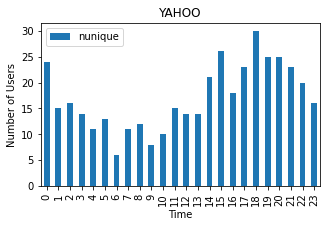

In [164]:
df_YAHOO.groupby(by=['Time'])['UserName'].agg(['nunique']).plot(kind='bar',title='YAHOO',figsize=(5,3))
plt.ylabel("Number of Users")
plt.show()

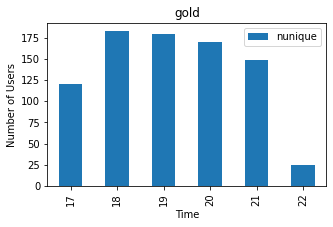

In [165]:
df_gold.groupby(by=['Time'])['UserName'].agg(['nunique']).plot(kind='bar',title='gold',figsize=(5,3))
plt.ylabel("Number of Users")
plt.show()

## by daily number of users

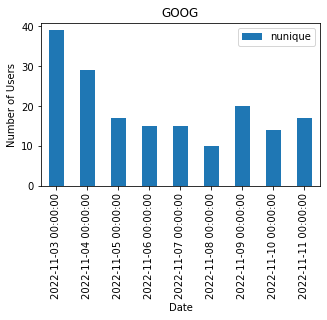

In [158]:
df_GOOG.groupby(by=['Date'])['UserName'].agg(['nunique']).plot(kind='bar',title='GOOG',figsize=(5,3))
plt.ylabel("Number of Users")
plt.show()

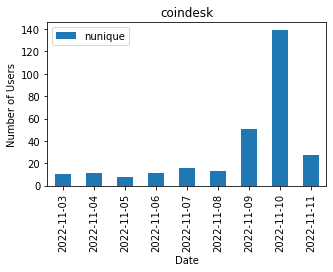

In [157]:
df_coindesk.groupby(by=['Date'])['UserName'].agg(['nunique']).plot(kind='bar',title='coindesk',figsize=(5,3))
plt.ylabel("Number of Users")
plt.show()